In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency, chi2
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
from sklearn.metrics.pairwise import euclidean_distances
from scipy.stats import norm
import statistics
from matplotlib.cbook import boxplot_stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from scipy.stats import norm

In [2]:
df = pd.read_csv('students_TargetOHC.csv')

In [3]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Target_Dropout,Target_Enrolled,Target_Graduate
0,1,8,5,2,1,1,1,13,10,6,...,0,0.000000,0,10.8,1.4,1.74,Dropout,1.0,0.0,0.0
1,1,6,1,11,1,1,1,1,3,4,...,6,13.666667,0,13.9,-0.3,0.79,Graduate,0.0,0.0,1.0
2,1,1,5,5,1,1,1,22,27,10,...,0,0.000000,0,10.8,1.4,1.74,Dropout,1.0,0.0,0.0
3,1,8,2,15,1,1,1,23,27,6,...,5,12.400000,0,9.4,-0.8,-3.12,Graduate,0.0,0.0,1.0
4,2,12,1,3,0,1,1,22,28,10,...,6,13.000000,0,13.9,-0.3,0.79,Graduate,0.0,0.0,1.0


In [4]:
# Verificação de dados em branco por variáveis independentes (não foi necessária nenhum condicionamento)
df.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [5]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [6]:
# Fazendo uma discriminação entre as variáveis quantitativas e qualitativas
quantitatives = ['Age at enrollment',
                 'Curricular units 1st sem (credited)',
                 'Curricular units 1st sem (enrolled)',
                 'Curricular units 1st sem (evaluations)',
                 'Curricular units 1st sem (approved)',
                 'Curricular units 1st sem (grade)',
                 'Curricular units 1st sem (without evaluations)',
                 'Curricular units 2nd sem (credited)',
                 'Curricular units 2nd sem (enrolled)',
                 'Curricular units 2nd sem (evaluations)',
                 'Curricular units 2nd sem (approved)',
                 'Curricular units 2nd sem (grade)',
                 'Curricular units 2nd sem (without evaluations)',
                 'Unemployment rate',
                 'Inflation rate', 
                 'GDP',
                 'Target_Dropout',
                 'Target_Enrolled',
                 'Target_Graduate']

In [7]:
qualitatives = ['Marital status', 
                'Application mode',
                'Application order',
                'Course',
                'Daytime/evening attendance', 
                'Previous qualification', 
                'Nacionality',
                'Mother\'s qualification', 
                'Father\'s qualification',
                'Mother\'s occupation', 
                'Father\'s occupation', 
                'Displaced',
                'Educational special needs', 
                'Debtor', 
                'Tuition fees up to date',
                'Gender', 
                'Scholarship holder', 
                'International',
                'Target_Dropout',
                'Target_Enrolled',
                'Target_Graduate']

In [8]:
# Matriz de correlação (quantitativas)
df[quantitatives].corr()

,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target_Dropout,Target_Enrolled,Target_Graduate
Age at enrollment,1.000000,0.226837,0.141327,0.139911,-0.053405,-0.156616,0.057470,0.207561,0.085914,0.056286,-0.112052,-0.173419,0.061654,0.025018,0.025377,-0.064678,0.254215,-0.055241,-0.195009
Curricular units 1st sem (credited),0.226837,1.000000,0.774344,0.542919,0.628394,0.122978,0.116262,0.944811,0.644826,0.427845,0.490478,0.132971,0.055256,0.009778,0.023348,-0.026513,-0.029308,-0.040113,0.058157
Curricular units 1st sem (enrolled),0.141327,0.774344,1.000000,0.680220,0.769083,0.376996,0.129337,0.753747,0.942627,0.599567,0.673341,0.361959,0.069547,0.038404,0.036758,-0.026262,-0.124635,-0.057678,0.160661
Curricular units 1st sem (evaluations),0.139911,0.542919,0.680220,1.000000,0.522396,0.418038,0.241800,0.522187,0.611842,0.778863,0.442265,0.355036,0.134296,0.061545,-0.006604,-0.099761,-0.090125,0.116654,-0.005366
Curricular units 1st sem (approved),-0.053405,0.628394,0.769083,0.522396,1.000000,0.696113,-0.013360,0.607661,0.733772,0.539934,0.904002,0.685560,-0.053983,0.051286,-0.007114,0.018459,-0.479112,-0.058646,0.492443
Curricular units 1st sem (grade),-0.156616,0.122978,0.376996,0.418038,0.696113,1.000000,-0.071660,0.113937,0.406167,0.487236,0.673335,0.837170,-0.066076,0.014821,-0.033904,0.054801,-0.480669,0.046781,0.412982
Curricular units 1st sem (without evaluations),0.057470,0.116262,0.129337,0.241800,-0.013360,-0.071660,1.000000,0.117359,0.109924,0.144683,-0.013070,-0.061482,0.583261,-0.045144,-0.052534,-0.144673,0.054230,0.027029,-0.071390
Curricular units 2nd sem (credited),0.207561,0.944811,0.753747,0.522187,0.607661,0.113937,0.117359,1.000000,0.676258,0.430978,0.519081,0.129770,0.070148,0.010580,0.014490,-0.024491,-0.033038,-0.044585,0.065073
Curricular units 2nd sem (enrolled),0.085914,0.644826,0.942627,0.611842,0.733772,0.406167,0.109924,0.676258,1.000000,0.604821,0.703258,0.395135,0.067697,0.064436,0.016844,-0.007592,-0.141515,-0.062592,0.180197
Curricular units 2nd sem (evaluations),0.056286,0.427845,0.599567,0.778863,0.539934,0.487236,0.144683,0.430978,0.604821,1.000000,0.463535,0.453394,0.144877,0.045808,-0.012643,-0.004854,-0.154999,0.162607,0.019949


In [25]:
# Correlação com cada coluna de Target
corr_matrix = df[quantitatives].corr()

# Colocar os valores de correlação tudo positivo (Modularização)
# E depois ordenando-as podemos ter uma clareza maior da correlação da variável Target com cada outras variáveis independentes

# Para Target_Dropout:
ordem_corr_var_ind = corr_matrix[['Target_Dropout']].map(lambda x: x if x > 0 else -1*x)
ordem_corr_var_ind

,Target_Dropout
Age at enrollment,0.254215
Curricular units 1st sem (credited),0.029308
Curricular units 1st sem (enrolled),0.124635
Curricular units 1st sem (evaluations),0.090125
Curricular units 1st sem (approved),0.479112
Curricular units 1st sem (grade),0.480669
Curricular units 1st sem (without evaluations),0.054230
Curricular units 2nd sem (credited),0.033038
Curricular units 2nd sem (enrolled),0.141515
Curricular units 2nd sem (evaluations),0.154999


In [26]:
ordem_corr_var_ind = ordem_corr_var_ind.sort_values(['Target_Dropout'], ascending=False)
ordem_corr_var_ind = ordem_corr_var_ind.drop(['Target_Dropout', 'Target_Enrolled', 'Target_Graduate'])
ordem_corr_var_ind

,Target_Dropout
Curricular units 2nd sem (grade),0.571792
Curricular units 2nd sem (approved),0.569500
Curricular units 1st sem (grade),0.480669
Curricular units 1st sem (approved),0.479112
Age at enrollment,0.254215
Curricular units 2nd sem (evaluations),0.154999
Curricular units 2nd sem (enrolled),0.141515
Curricular units 1st sem (enrolled),0.124635
Curricular units 1st sem (evaluations),0.090125
Curricular units 2nd sem (without evaluations),0.079901


In [27]:
# Para Target_Enrolled:
ordem_corr_var_ind = corr_matrix[['Target_Enrolled']].map(lambda x: x if x > 0 else -1*x)
ordem_corr_var_ind

,Target_Enrolled
Age at enrollment,0.055241
Curricular units 1st sem (credited),0.040113
Curricular units 1st sem (enrolled),0.057678
Curricular units 1st sem (evaluations),0.116654
Curricular units 1st sem (approved),0.058646
Curricular units 1st sem (grade),0.046781
Curricular units 1st sem (without evaluations),0.027029
Curricular units 2nd sem (credited),0.044585
Curricular units 2nd sem (enrolled),0.062592
Curricular units 2nd sem (evaluations),0.162607


In [28]:
ordem_corr_var_ind = ordem_corr_var_ind.sort_values(['Target_Enrolled'], ascending=False)
ordem_corr_var_ind = ordem_corr_var_ind.drop(['Target_Dropout', 'Target_Enrolled', 'Target_Graduate'])
ordem_corr_var_ind

,Target_Enrolled
Curricular units 2nd sem (evaluations),0.162607
Curricular units 1st sem (evaluations),0.116654
Curricular units 2nd sem (grade),0.079635
Curricular units 2nd sem (enrolled),0.062592
Curricular units 1st sem (approved),0.058646
Curricular units 2nd sem (approved),0.058627
Curricular units 1st sem (enrolled),0.057678
Age at enrollment,0.055241
Unemployment rate,0.051552
Curricular units 1st sem (grade),0.046781


In [29]:
# Para Target_Graduate
ordem_corr_var_ind = corr_matrix[['Target_Graduate']].map(lambda x: x if x > 0 else -1*x)
ordem_corr_var_ind

,Target_Graduate
Age at enrollment,0.195009
Curricular units 1st sem (credited),0.058157
Curricular units 1st sem (enrolled),0.160661
Curricular units 1st sem (evaluations),0.005366
Curricular units 1st sem (approved),0.492443
Curricular units 1st sem (grade),0.412982
Curricular units 1st sem (without evaluations),0.071390
Curricular units 2nd sem (credited),0.065073
Curricular units 2nd sem (enrolled),0.180197
Curricular units 2nd sem (evaluations),0.019949


In [30]:
ordem_corr_var_ind = ordem_corr_var_ind.sort_values(['Target_Graduate'], ascending=False)
ordem_corr_var_ind = ordem_corr_var_ind.drop(['Target_Dropout', 'Target_Enrolled', 'Target_Graduate'])
ordem_corr_var_ind

,Target_Graduate
Curricular units 2nd sem (approved),0.576840
Curricular units 1st sem (approved),0.492443
Curricular units 2nd sem (grade),0.472864
Curricular units 1st sem (grade),0.412982
Age at enrollment,0.195009
Curricular units 2nd sem (enrolled),0.180197
Curricular units 1st sem (enrolled),0.160661
Curricular units 2nd sem (without evaluations),0.092402
Curricular units 1st sem (without evaluations),0.071390
Curricular units 2nd sem (credited),0.065073


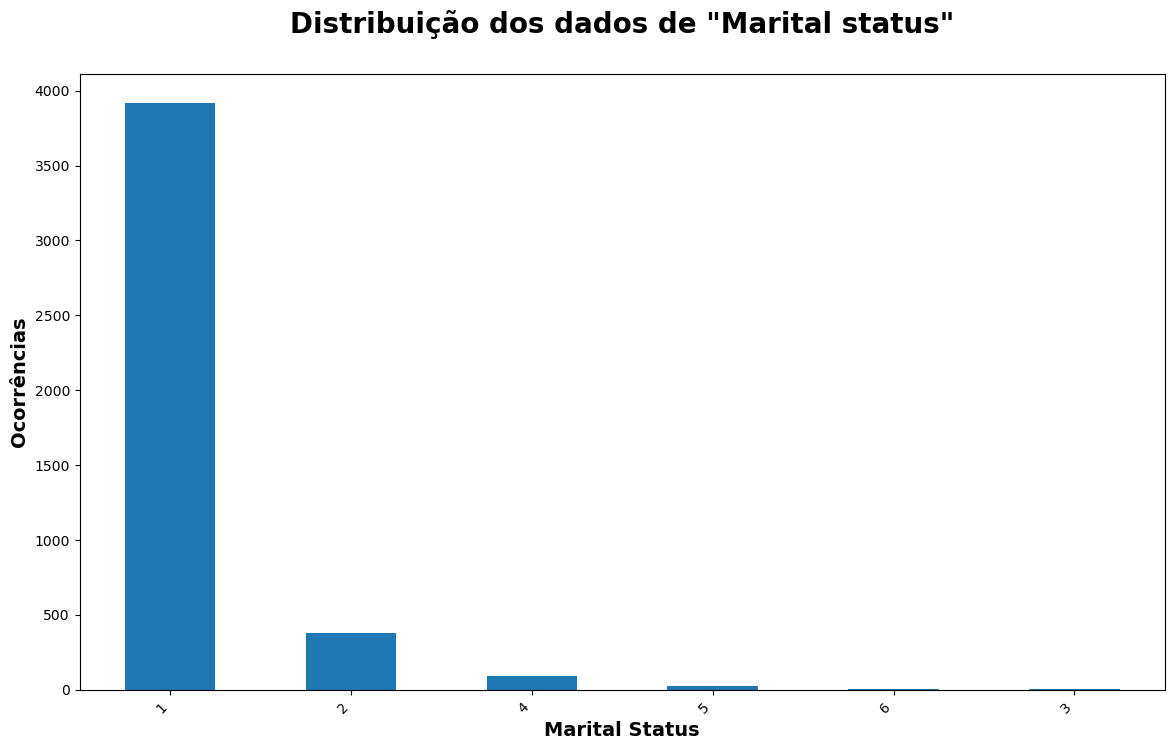

In [31]:
# Distribuição dos dados para as variáveis categóricas para verificar a frequência para cada categoria das variáveis
df['Marital status'].value_counts().to_frame().plot(kind='bar', legend=None, figsize=(14,8))
plt.title('Distribuição dos dados de "Marital status"\n', fontdict = {'fontsize':20, 'fontweight':'bold'})
plt.ylabel('Ocorrências',{'fontsize':14,'fontweight':'bold'})
plt.xlabel('Marital Status',{'fontsize':14,'fontweight':'bold'})
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

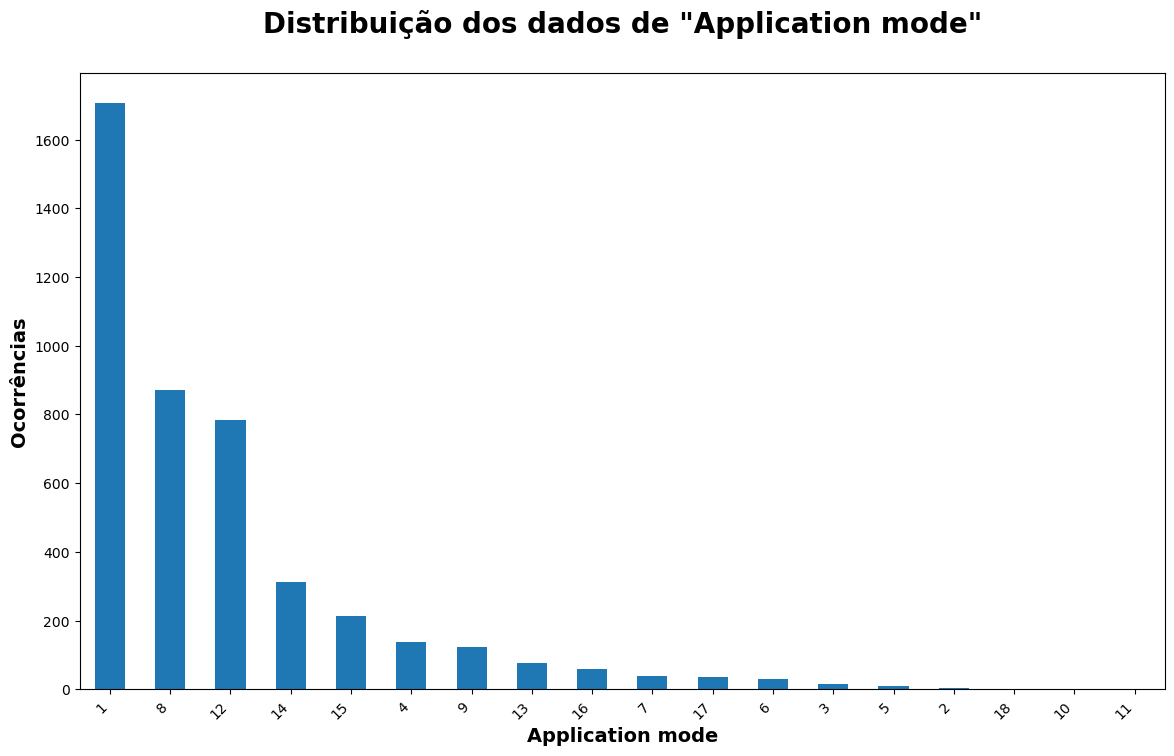

In [32]:
df['Application mode'].value_counts().to_frame().plot(kind='bar', legend=None, figsize=(14,8))
plt.title('Distribuição dos dados de "Application mode"\n', fontdict = {'fontsize':20, 'fontweight':'bold'})
plt.ylabel('Ocorrências',{'fontsize':14,'fontweight':'bold'})
plt.xlabel('Application mode',{'fontsize':14,'fontweight':'bold'})
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

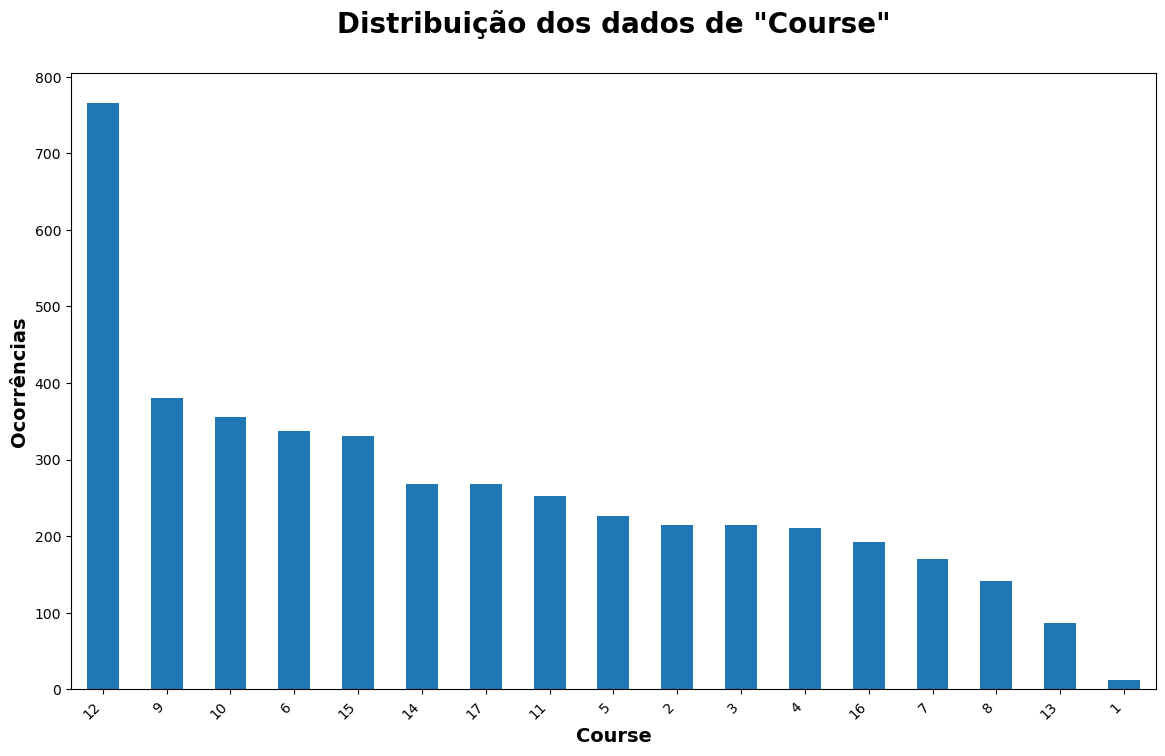

In [33]:
df['Course'].value_counts().to_frame().plot(kind='bar', legend=None, figsize=(14,8))
plt.title('Distribuição dos dados de "Course"\n', fontdict = {'fontsize':20, 'fontweight':'bold'})
plt.ylabel('Ocorrências',{'fontsize':14,'fontweight':'bold'})
plt.xlabel('Course',{'fontsize':14,'fontweight':'bold'})
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

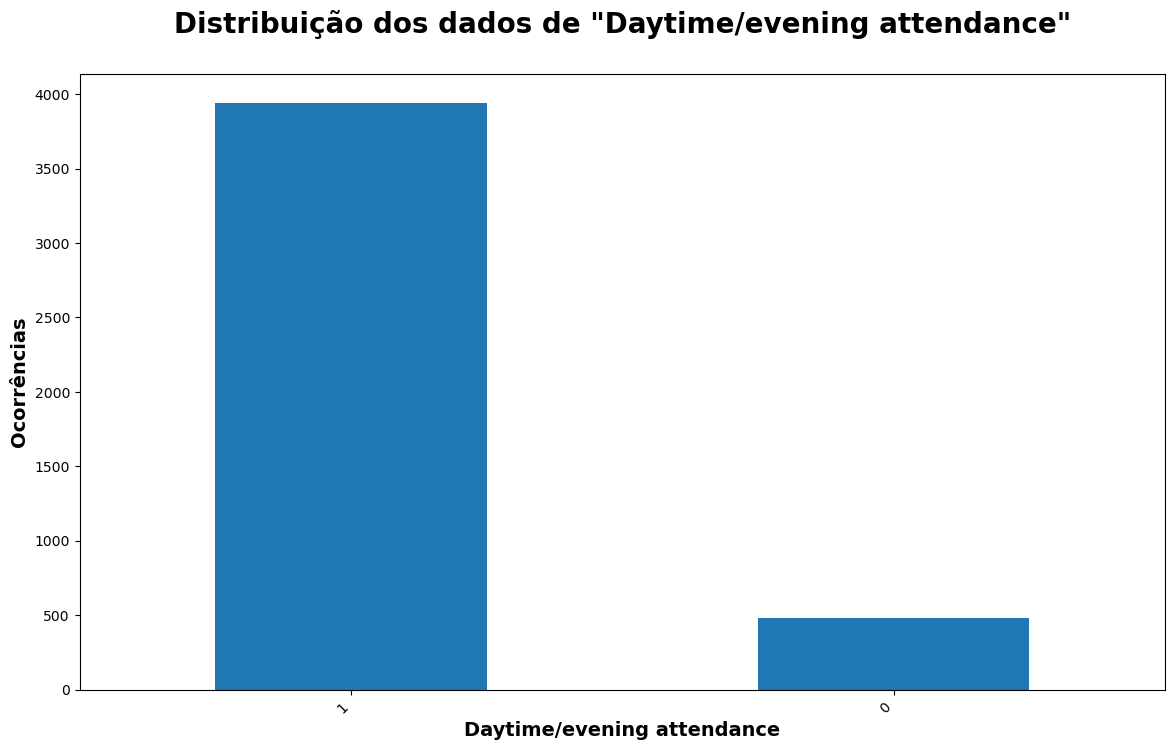

In [34]:
df['Daytime/evening attendance'].value_counts().to_frame().plot(kind='bar', legend=None, figsize=(14,8))
plt.title('Distribuição dos dados de "Daytime/evening attendance"\n', fontdict = {'fontsize':20, 'fontweight':'bold'})
plt.ylabel('Ocorrências',{'fontsize':14,'fontweight':'bold'})
plt.xlabel('Daytime/evening attendance',{'fontsize':14,'fontweight':'bold'})
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

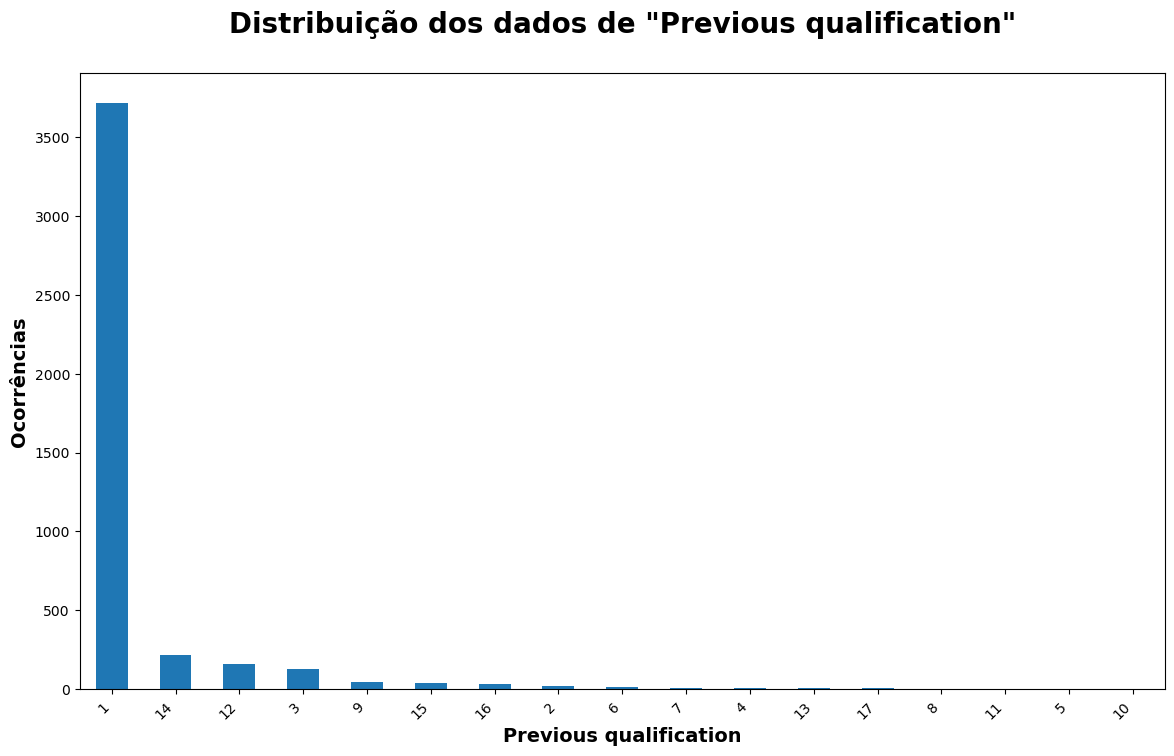

In [35]:
df['Previous qualification'].value_counts().to_frame().plot(kind='bar', legend=None, figsize=(14,8))
plt.title('Distribuição dos dados de "Previous qualification"\n', fontdict = {'fontsize':20, 'fontweight':'bold'})
plt.ylabel('Ocorrências',{'fontsize':14,'fontweight':'bold'})
plt.xlabel('Previous qualification',{'fontsize':14,'fontweight':'bold'})
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

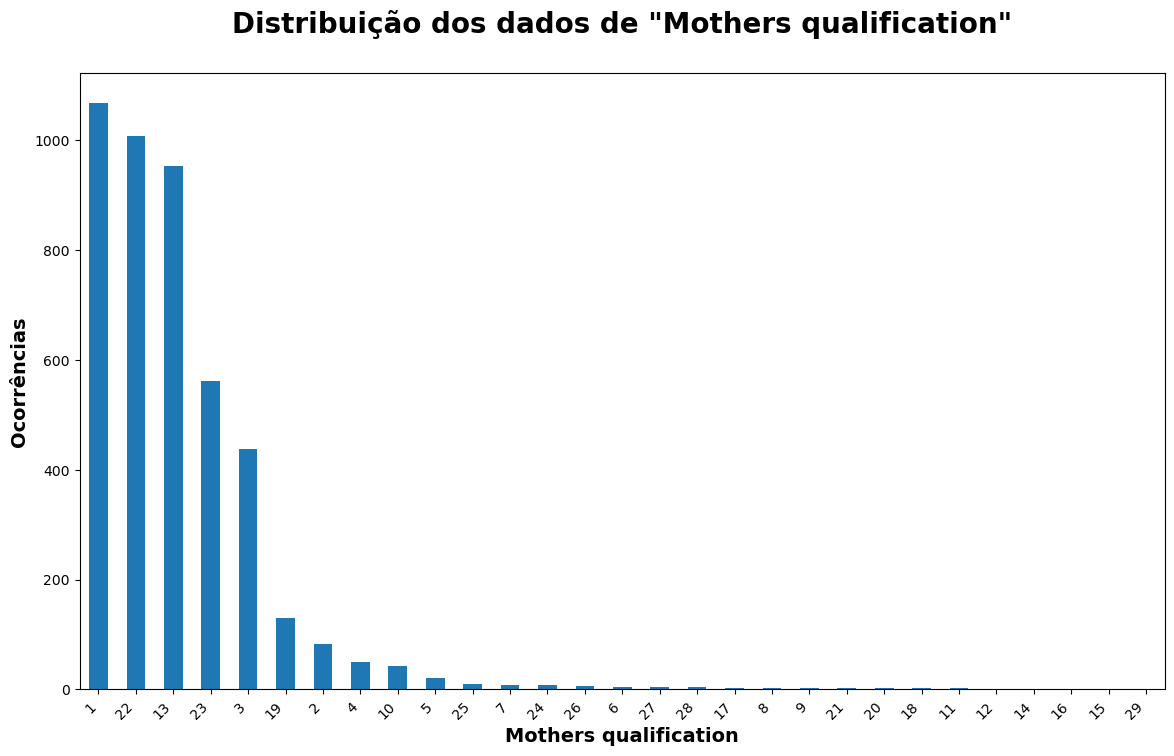

In [36]:
df['Mother\'s qualification'].value_counts().to_frame().plot(kind='bar', legend=None, figsize=(14,8))
plt.title('Distribuição dos dados de "Mothers qualification"\n', fontdict = {'fontsize':20, 'fontweight':'bold'})
plt.ylabel('Ocorrências',{'fontsize':14,'fontweight':'bold'})
plt.xlabel('Mothers qualification',{'fontsize':14,'fontweight':'bold'})
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

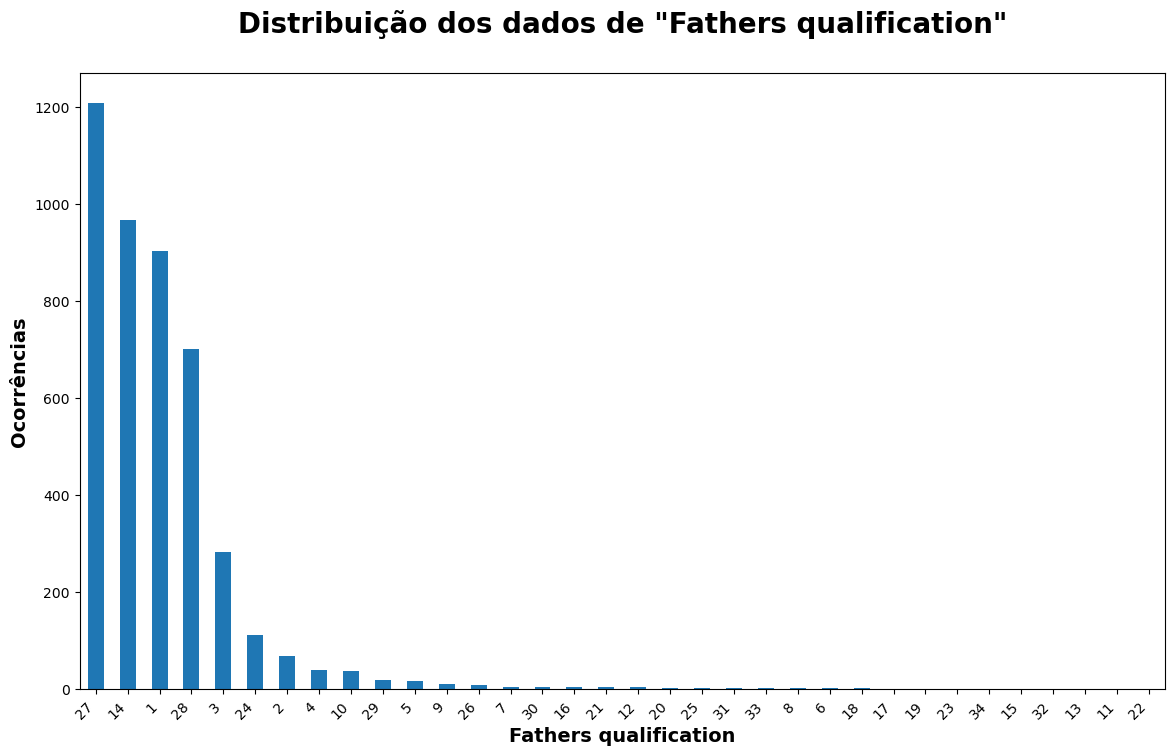

In [37]:
df['Father\'s qualification'].value_counts().to_frame().plot(kind='bar', legend=None, figsize=(14,8))
plt.title('Distribuição dos dados de "Fathers qualification"\n', fontdict = {'fontsize':20, 'fontweight':'bold'})
plt.ylabel('Ocorrências',{'fontsize':14,'fontweight':'bold'})
plt.xlabel('Fathers qualification',{'fontsize':14,'fontweight':'bold'})
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

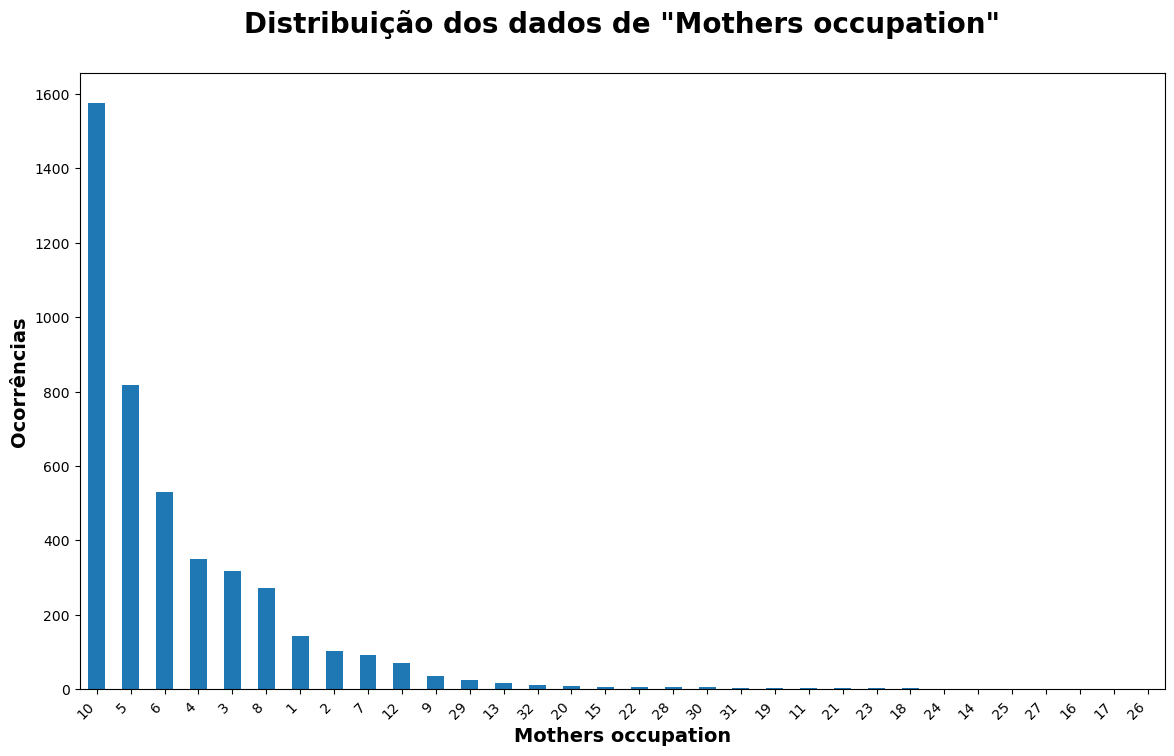

In [38]:
df['Mother\'s occupation'].value_counts().to_frame().plot(kind='bar', legend=None, figsize=(14,8))
plt.title('Distribuição dos dados de "Mothers occupation"\n', fontdict = {'fontsize':20, 'fontweight':'bold'})
plt.ylabel('Ocorrências',{'fontsize':14,'fontweight':'bold'})
plt.xlabel('Mothers occupation',{'fontsize':14,'fontweight':'bold'})
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

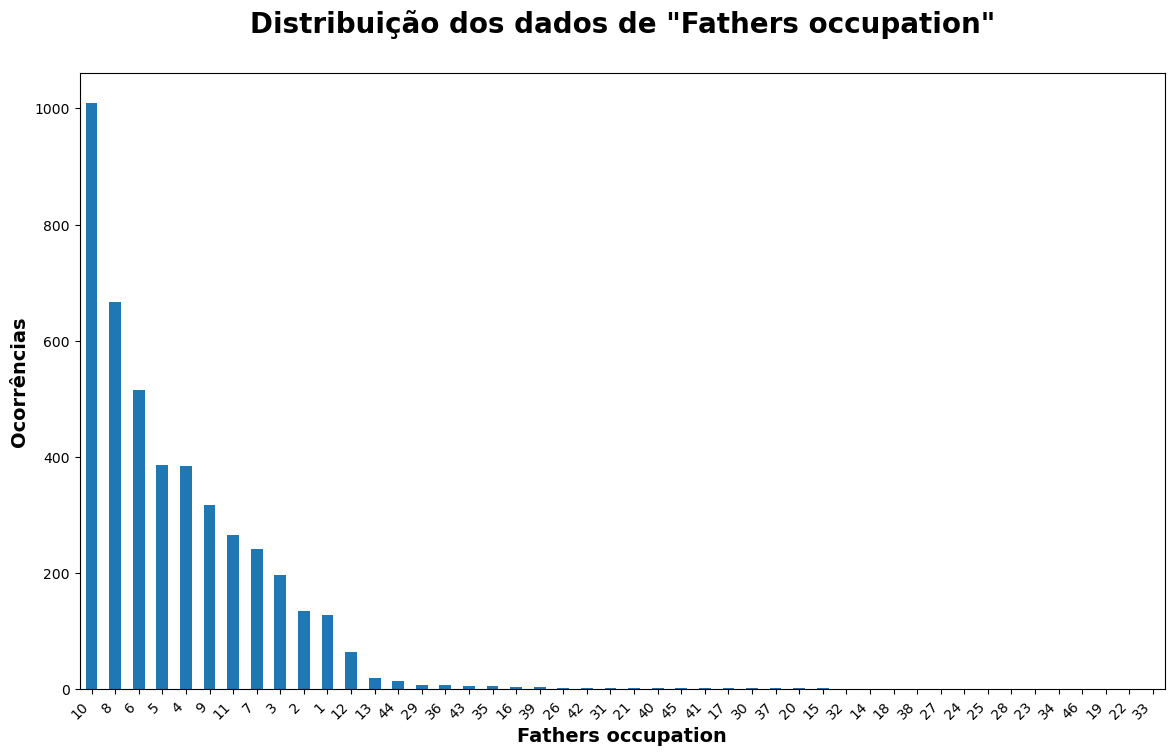

In [39]:
df['Father\'s occupation'].value_counts().to_frame().plot(kind='bar', legend=None, figsize=(14,8))
plt.title('Distribuição dos dados de "Fathers occupation"\n', fontdict = {'fontsize':20, 'fontweight':'bold'})
plt.ylabel('Ocorrências',{'fontsize':14,'fontweight':'bold'})
plt.xlabel('Fathers occupation',{'fontsize':14,'fontweight':'bold'})
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

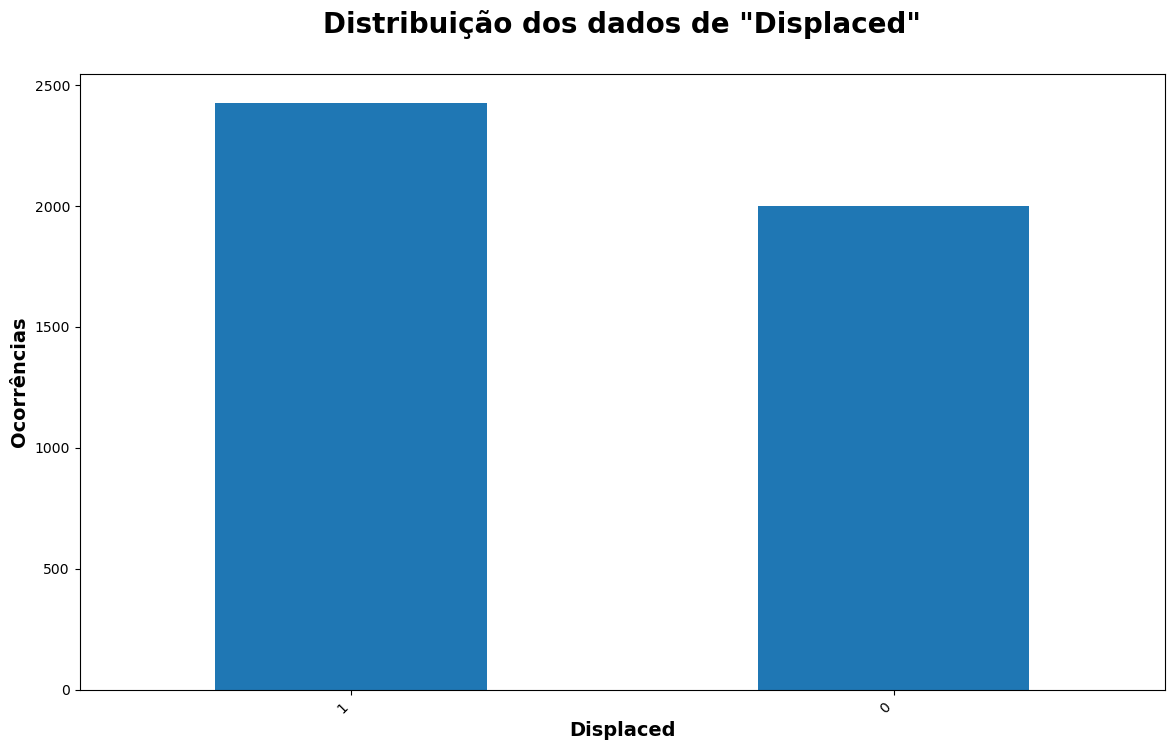

In [40]:
df['Displaced'].value_counts().to_frame().plot(kind='bar', legend=None, figsize=(14,8))
plt.title('Distribuição dos dados de "Displaced"\n', fontdict = {'fontsize':20, 'fontweight':'bold'})
plt.ylabel('Ocorrências',{'fontsize':14,'fontweight':'bold'})
plt.xlabel('Displaced',{'fontsize':14,'fontweight':'bold'})
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

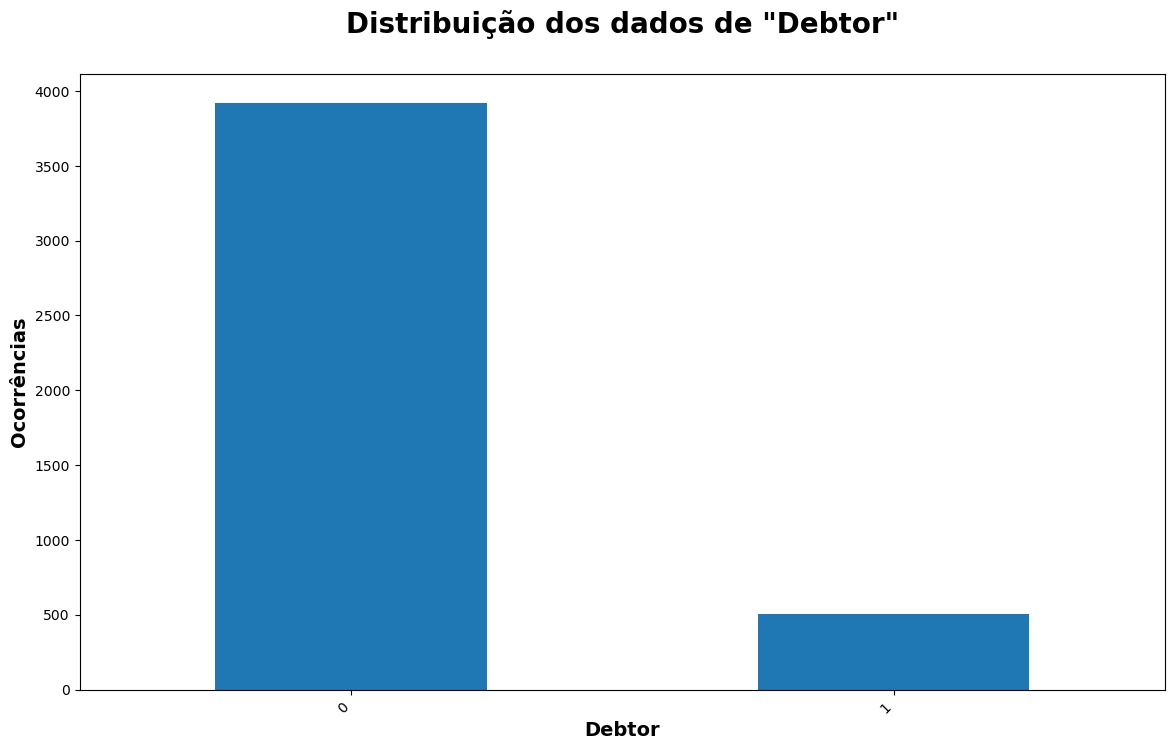

In [41]:
df['Debtor'].value_counts().to_frame().plot(kind='bar', legend=None, figsize=(14,8))
plt.title('Distribuição dos dados de "Debtor"\n', fontdict = {'fontsize':20, 'fontweight':'bold'})
plt.ylabel('Ocorrências',{'fontsize':14,'fontweight':'bold'})
plt.xlabel('Debtor',{'fontsize':14,'fontweight':'bold'})
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

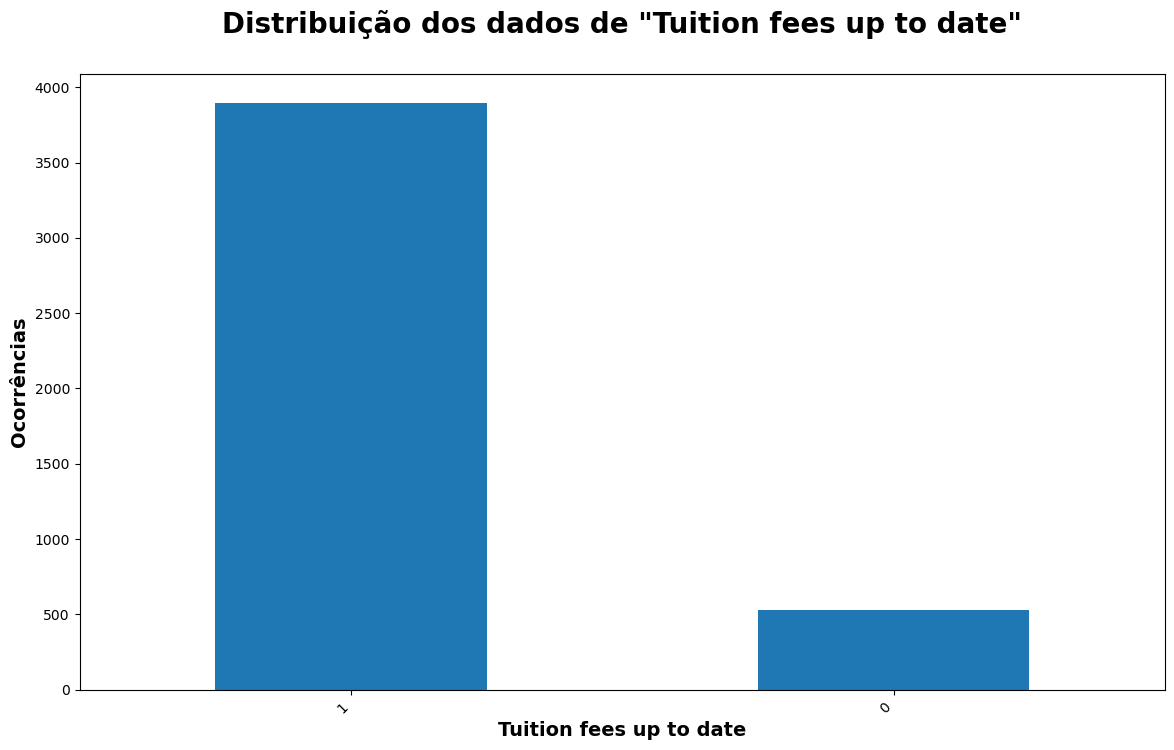

In [42]:
df['Tuition fees up to date'].value_counts().to_frame().plot(kind='bar', legend=None, figsize=(14,8))
plt.title('Distribuição dos dados de "Tuition fees up to date"\n', fontdict = {'fontsize':20, 'fontweight':'bold'})
plt.ylabel('Ocorrências',{'fontsize':14,'fontweight':'bold'})
plt.xlabel('Tuition fees up to date',{'fontsize':14,'fontweight':'bold'})
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

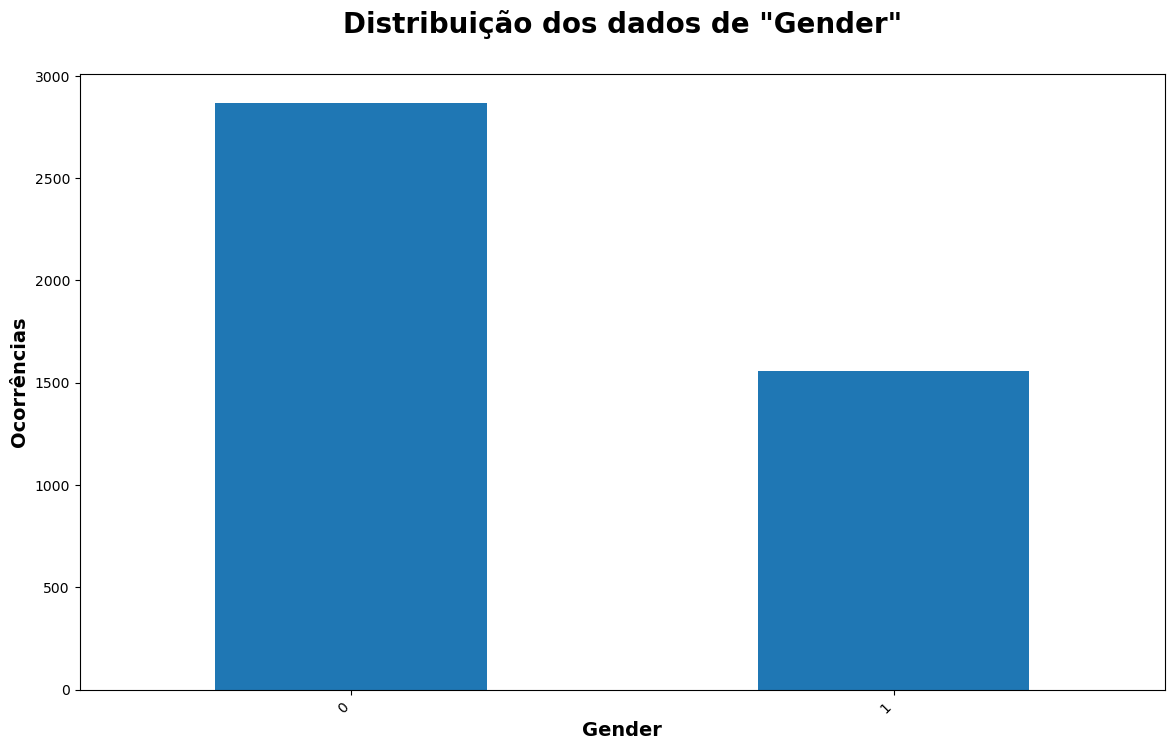

In [43]:
df['Gender'].value_counts().to_frame().plot(kind='bar', legend=None, figsize=(14,8))
plt.title('Distribuição dos dados de "Gender"\n', fontdict = {'fontsize':20, 'fontweight':'bold'})
plt.ylabel('Ocorrências',{'fontsize':14,'fontweight':'bold'})
plt.xlabel('Gender',{'fontsize':14,'fontweight':'bold'})
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

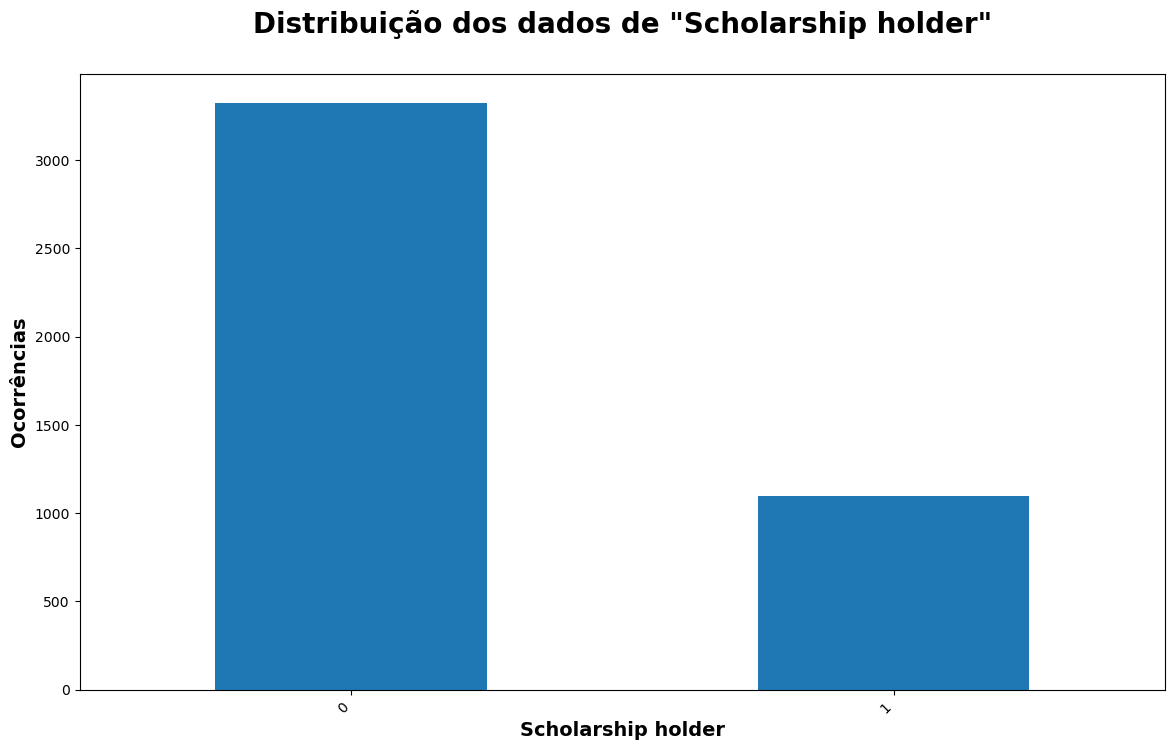

In [44]:
df['Scholarship holder'].value_counts().to_frame().plot(kind='bar', legend=None, figsize=(14,8))
plt.title('Distribuição dos dados de "Scholarship holder"\n', fontdict = {'fontsize':20, 'fontweight':'bold'})
plt.ylabel('Ocorrências',{'fontsize':14,'fontweight':'bold'})
plt.xlabel('Scholarship holder',{'fontsize':14,'fontweight':'bold'})
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

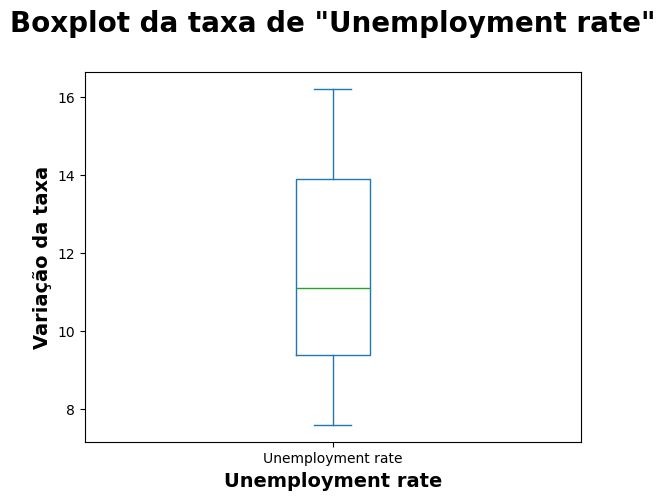

In [45]:
# Boxplot para as numéricas e contínuas para verificar se há valores discrepantes (não houve discrepâncias)
df[['Unemployment rate']].plot(kind='box')
plt.title('Boxplot da taxa de "Unemployment rate"\n', fontdict = {'fontsize':20, 'fontweight':'bold'})
plt.ylabel('Variação da taxa',fontdict = {'fontsize':14,'fontweight':'bold'})
plt.xlabel('Unemployment rate',fontdict = {'fontsize':14,'fontweight':'bold'})
plt.show()

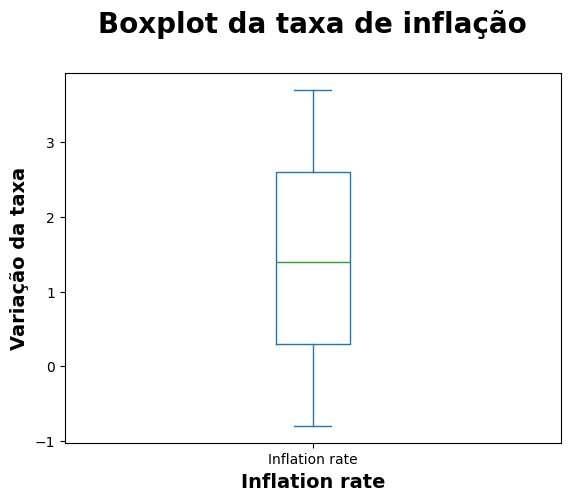

In [46]:
df[['Inflation rate']].plot(kind='box')
plt.title('Boxplot da taxa de inflação\n', fontdict = {'fontsize':20, 'fontweight':'bold'})
plt.ylabel('Variação da taxa',fontdict = {'fontsize':14,'fontweight':'bold'})
plt.xlabel('Inflation rate',fontdict = {'fontsize':14,'fontweight':'bold'})
plt.show()

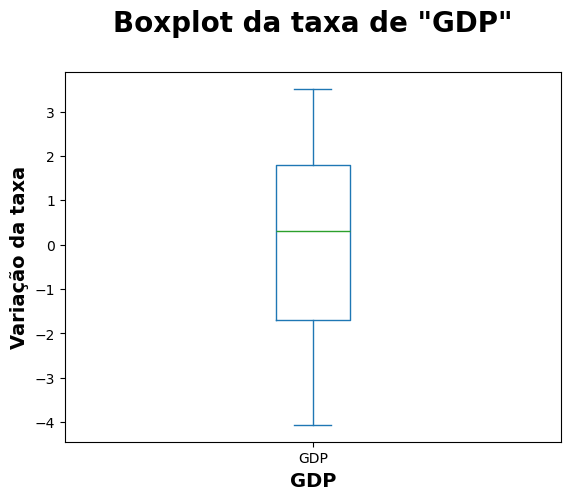

In [47]:
df[['GDP']].plot(kind='box')
plt.title('Boxplot da taxa de "GDP"\n', fontdict = {'fontsize':20, 'fontweight':'bold'})
plt.ylabel('Variação da taxa',fontdict = {'fontsize':14,'fontweight':'bold'})
plt.xlabel('GDP',fontdict = {'fontsize':14,'fontweight':'bold'})
plt.show()

In [48]:
# Distribuição das variáveis numéricas (com curva normal)
def curva_normal(df):
    mu, std = norm.fit(df) 
    # Plot
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)

    plt.plot(x, p, 'k', linewidth=2)

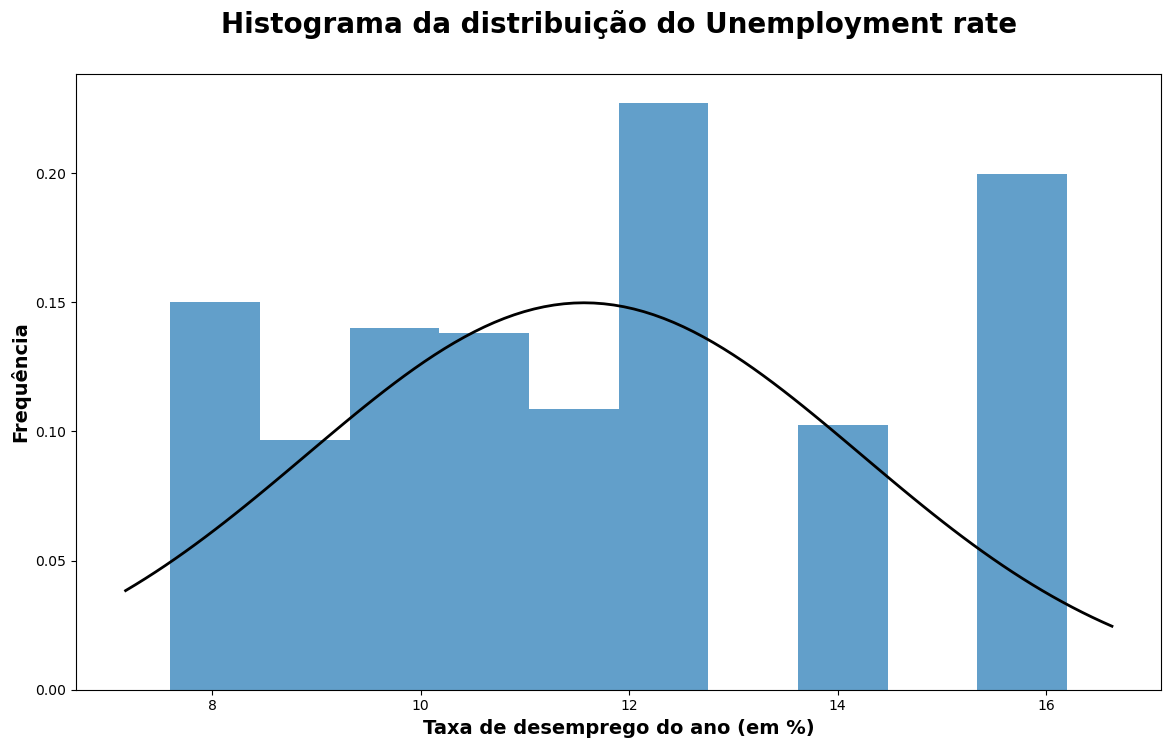

In [49]:
# Distribuição normal e um histograma de variáveis numéricas
contagem, tam_coluna = np.histogram(df['Unemployment rate'])
df[['Unemployment rate']].plot(kind='hist', alpha=0.7, density=True, figsize=(14,8),legend=None)
plt.title('Histograma da distribuição do Unemployment rate\n', fontdict = {'fontsize':20, 'fontweight':'bold'})
plt.ylabel('Frequência',fontdict = {'fontsize':14,'fontweight':'bold'})
plt.xlabel('Taxa de desemprego do ano (em %)',fontdict = {'fontsize':14,'fontweight':'bold'})
curva_normal(df[['Unemployment rate']])

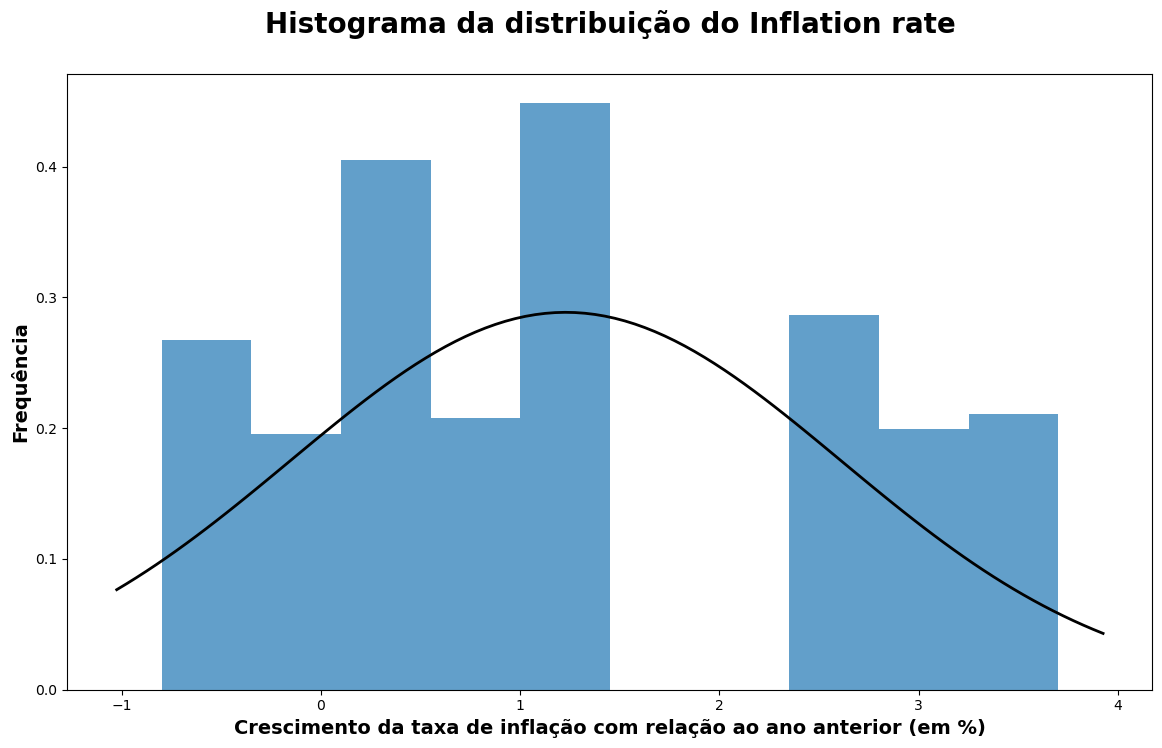

In [50]:
contagem, tam_coluna = np.histogram(df['Inflation rate'])
df[['Inflation rate']].plot(kind='hist', alpha=0.7, density=True, figsize=(14,8),legend=None)
plt.title('Histograma da distribuição do Inflation rate\n', fontdict = {'fontsize':20, 'fontweight':'bold'})
plt.ylabel('Frequência',fontdict = {'fontsize':14,'fontweight':'bold'})
plt.xlabel('Crescimento da taxa de inflação com relação ao ano anterior (em %)',fontdict = {'fontsize':14,'fontweight':'bold'})
curva_normal(df[['Inflation rate']])

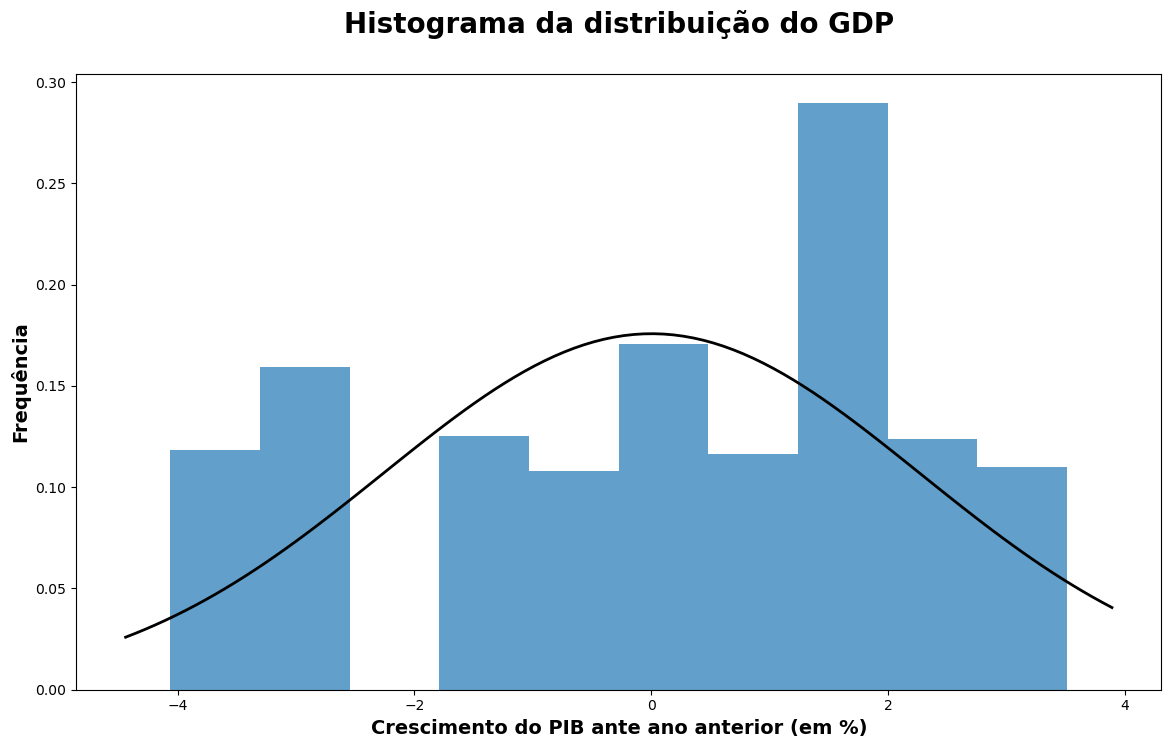

In [51]:
contagem, tam_coluna = np.histogram(df['GDP'])
df[['GDP']].plot(kind='hist', alpha=0.7, density=True, figsize=(14,8),legend=None)
plt.title('Histograma da distribuição do GDP\n', fontdict = {'fontsize':20, 'fontweight':'bold'})
plt.ylabel('Frequência',fontdict = {'fontsize':14,'fontweight':'bold'})
plt.xlabel('Crescimento do PIB ante ano anterior (em %)',fontdict = {'fontsize':14,'fontweight':'bold'})
curva_normal(df[['GDP']])